In [1]:
import xarray as xr
import glob
import matplotlib.pyplot as plt

In [2]:
start_year = 1982
end_year = 2015
file_path = r'/home/aithc/data/phd/data/gimms_pheno/pheno'

In [3]:
ndvi_pheno_6030_all = []
ndvi_pheno_9060_all = []

for year in range(start_year,end_year+1):
    
    print(year)
    
    pheno_6030_path = glob.glob(file_path + str(year)+'*6030*.nc')
    pheno_9060_path = glob.glob(file_path + str(year)+'*9060*.nc')
    
    ndvi_pheno_6030 = []
    ndvi_pheno_9060 = []
    
    for path_6030_n  in pheno_6030_path:
        print(path_6030_n)
        pheno_6030_n = xr.open_dataset(path_6030_n)['phenology']
        ndvi_pheno_6030.append(pheno_6030_n)
    
    for path_9060_n  in pheno_9060_path:
        print(path_9060_n)
        pheno_9060_n = xr.open_dataset(path_9060_n)['phenology']
        ndvi_pheno_9060.append(pheno_9060_n)
        
    ndvi_pheno_6030 = xr.concat(ndvi_pheno_6030,dim = 'lon')
    ndvi_pheno_9060 = xr.concat(ndvi_pheno_9060,dim = 'lon')
    
    ndvi_pheno_6030_all.append(ndvi_pheno_6030)
    ndvi_pheno_9060_all.append(ndvi_pheno_9060)

ndvi_pheno_6030_all = xr.concat(ndvi_pheno_6030_all, dim = 'pheno')
ndvi_pheno_9060_all = xr.concat(ndvi_pheno_9060_all, dim = 'pheno')

1982
/home/aithc/data/phd/data/gimms_pheno/pheno19826030_-180-120.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19826030_120180.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19826030_60120.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19826030_060.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19826030_-120-60.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19826030_-600.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19829060_120180.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19829060_-600.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19829060_-120-60.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19829060_-180-120.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19829060_60120.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19829060_060.nc
1983
/home/aithc/data/phd/data/gimms_pheno/pheno19836030_060.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19836030_-600.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19836030_-180-120.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19836030_-120-60.nc
/home/

1994
/home/aithc/data/phd/data/gimms_pheno/pheno19946030_060.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19946030_-120-60.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19946030_-600.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19946030_-180-120.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19946030_60120.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19946030_120180.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19949060_120180.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19949060_-120-60.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19949060_060.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19949060_-600.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19949060_-180-120.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19949060_60120.nc
1995
/home/aithc/data/phd/data/gimms_pheno/pheno19956030_-600.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19956030_060.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19956030_60120.nc
/home/aithc/data/phd/data/gimms_pheno/pheno19956030_120180.nc
/home/aith

2006
/home/aithc/data/phd/data/gimms_pheno/pheno20066030_060.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20066030_60120.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20066030_-120-60.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20066030_-180-120.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20066030_120180.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20066030_-600.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20069060_-180-120.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20069060_060.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20069060_-120-60.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20069060_-600.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20069060_120180.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20069060_60120.nc
2007
/home/aithc/data/phd/data/gimms_pheno/pheno20076030_060.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20076030_-120-60.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20076030_-180-120.nc
/home/aithc/data/phd/data/gimms_pheno/pheno20076030_-600.nc
/home/

In [4]:
ndvi_pheno_9060_all.to_netcdf('/home/aithc/data/phd/data/gimms_pheno/ndvi_pheno_9060_all.nc',
                             encoding = {'phenology':{'dtype':'int16','_FillValue':-9999,
                                                   'zlib':True,'complevel':9}})

ndvi_pheno_6030_all.to_netcdf('/home/aithc/data/phd/data/gimms_pheno/ndvi_pheno_6030_all.nc',
                             encoding = {'phenology':{'dtype':'int16','_FillValue':-9999,
                                                   'zlib':True,'complevel':9}})

In [2]:
ndvi_pheno_9060_all = xr.open_dataset(r'/home/aithc/data/phd/data/gimms_pheno/ndvi_pheno_9060_all.nc')['phenology']
ndvi_pheno_6030_all = xr.open_dataset(r'/home/aithc/data/phd/data/gimms_pheno/ndvi_pheno_6030_all.nc')['phenology']

In [3]:
ndvi_pheno_all = xr.concat([ndvi_pheno_9060_all,ndvi_pheno_6030_all], dim = 'lat')

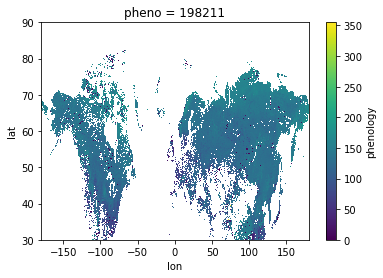

In [4]:
ndvi_pheno_all.sel(pheno = 198211).plot()

In [5]:
ndvi_pheno_all.to_netcdf('/home/aithc/data/phd/data/gimms_pheno/ndvi_pheno_all.nc',
                             encoding = {'phenology':{'dtype':'int16','_FillValue':-9999,
                                                   'zlib':True,'complevel':9}})